
# Notes on Regression Project

This document contains notes and methodologies related to a regression project focusing on fitting models to terrain data and the Franke function using various techniques. Error analysis using Mean Squared Error (MSE) and $R^2$ score is also performed.



## Table of Contents
1. [Introduction](#Introduction)
2. [Franke Function](#Franke-Function)
3. [Ordinary Least Squares (OLS) Polynomial Fit](#Ordinary-Least-Squares-Polynomial-Fit)
4. [Error Analysis: MSE and $R^2$](#Error-Analysis-MSE-and-R2)
5. [SVD Decomposition](#SVD-Decomposition)
6. [Lasso and Ridge Regression](#Lasso-and-Ridge-Regression)
7. [Bias-Variance Trade-off](#Bias-Variance-Trade-off)
8. [Resampling Techniques: Bootstrap](#Resampling-Techniques-Bootstrap)
9. [Results and Discussion](#Results-and-Discussion)
10. [Conclusion](#Conclusion)



## Introduction
This document contains notes and methodologies related to a regression project focusing on fitting models to terrain data and the Franke function using various techniques. Error analysis using Mean Squared Error (MSE) and $R^2$ score is also performed.



## Franke Function

### Definition
The Franke function is a commonly used test function in regression problems. The Franke function is defined as:

$$
f(x, y) = \frac{3}{4} e^{-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}} + \frac{3}{4} e^{-\frac{(9x+1)^2}{49} - \frac{(9y+1)}{10}} + \frac{1}{2} e^{-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}} - \frac{1}{5} e^{-(9x-4)^2 - (9y-7)^2}
$$

- This function is used for testing the performance of polynomial regression models.
- The Franke function is suitable for testing purposes because it has multiple peaks and valleys, making it nontrivial to fit.




## Ordinary Least Squares (OLS) Polynomial Fit

### Theory

The OLS method for creating polynomial regression models:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Where $X$ is the design matrix, and $y$ is the target vector.



### Application on the Franke Function
- Generate data using the Franke function.
- Fit polynomial models of different degrees.
- Calculate and display MSE and $R^2$ for each polynomial degree.

Here is an example of fitting a polynomial model to the Franke function and calculating the error metrics:


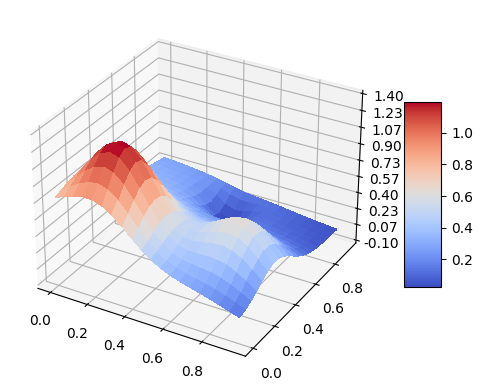

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



## Error Analysis: MSE and $R^2$

### Mean Squared Error (MSE)
The MSE is a commonly used metric to measure the average squared difference between the predicted and actual values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where $y_i$ is the true value and $\hat{y}_i$ is the predicted value.

### $R^2$ Score
The $R^2$ score, also known as the coefficient of determination, provides a measure of how well the predictions match the actual values:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where $\bar{y}$ is the mean of the observed data.




## SVD Decomposition

### Theory

The OLS solution for the regression coefficients $\hat{\beta}$ using matrix inversion is given by:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

This matrix inversion can be computationally expensive and unstable if the matrix is ill-conditioned or near-singular. To avoid this problem, we can use Singular Value Decomposition (SVD). The design matrix $X$ can be decomposed as:

$$
X = U \Sigma V^T
$$

Where:
- $U$ is an $n \times n$ orthogonal matrix,
- $\Sigma$ is a diagonal matrix of singular values,
- $V^T$ is the transpose of an orthogonal $p \times p$ matrix.

The solution for $\hat{\beta}$ using SVD is:

$$
\hat{\beta} = V \Sigma^{-1} U^T y
$$

### Implementation
Implementing SVD to improve the stability of polynomial regression.



## Lasso and Ridge Regression

### Theory

- **Lasso**: Adds an $L_1$ penalty to the regression problem.

- **Ridge**: Adds an $L_2$ penalty to the regression problem. 

Discuss regularization and the advantages of each method.



### Implementation





## Bias-Variance Trade-off

### Theory

The bias-variance trade-off is a fundamental concept in model fitting. **Bias** is the error introduced by oversimplifying the model, while **variance** is the error introduced by model complexity. Regularization techniques like Lasso and Ridge are used to balance this trade-off by reducing the variance (overfitting) while controlling the bias.



## Resampling Techniques: Bootstrap

### Theory

The **Bootstrap** method estimates the uncertainty of model parameters by resampling the dataset with replacement and recalculating the model fits from each bootstrap sample.

### Application

The following code demonstrates the use of the bootstrap technique on the Franke function data to estimate the variability of the model parameters.


In [ ]:

from sklearn.utils import resample

# Bootstrap implementation
n_bootstraps = 100
boot_mse = np.zeros(n_bootstraps)
boot_r2 = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    X_, z_ = resample(X_poly, z)
    model.fit(X_, z_)
    z_pred_ = model.predict(X_poly)
    boot_mse[i] = mean_squared_error(z, z_pred_)
    boot_r2[i] = r2_score(z, z_pred_)


print(f"Bootstrap MSE: {np.mean(boot_mse)}, MSE Std: {np.std(boot_mse)}")
print(f"Bootstrap R^2: {np.mean(boot_r2)}, R^2 Std: {np.std(boot_r2)}")



## Results and Discussion

- Discuss the performance of the models on the Franke function and terrain data.
- Compare results from OLS, Lasso, Ridge, and SVD.
- Analyze the results using the bias-variance trade-off.
- Error analysis using MSE and $R^2$ scores for different methods.



## Conclusion

Summarize the key findings of the project and discuss possible improvements for future work.
